In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import h5py
import os
import json
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
config={
    "model"           : "vgg16",
    "weights"         : "imagenet",
    
    "features_path"   : "C:\\Users\\nickm\\PythonProjects\\FullStackDataScience\\car_damage_directional\\features.h5",
    "labels_path"     : "C:\\Users\\nickm\\PythonProjects\\FullStackDataScience\\car_damage_directional\\labels.h5",
    "classifier_path" : "C:\\Users\\nickm\\PythonProjects\\FullStackDataScience\\car_damage_directional\\classifier.pickle",
    "model_path"      : "C:\\Users\\nickm\\PythonProjects\\FullStackDataScience\\car_damage_directional\\model",
    
    "test_size"       : 0.20,
    "seed"            : 9,
}

In [20]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [21]:
seed = config["seed"]
features_path = config["features_path"]
labels_path = config["labels_path"]
test_size = config["test_size"]
classifier_path = config["classifier_path"]

In [22]:
#importing features and labels.
h5f_data = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')

features_string = h5f_data['dataset_1']
labels_string = h5f_label['dataset_1']

features = np.array(features_string)
labels = np.array(labels_string)

h5f_data.close()
h5f_label.close()

In [23]:
#verifying the shape of features and labels.
print("[INFO] features shape: {}".format(features.shape))
print("[INFO] labels shape: {}".format(labels.shape))

print("[INFO] training started...")
#splitting data into training and test sets.
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                 np.array(labels),
                                                                 test_size=test_size,
                                                                 random_state=seed)

print("[INFO] Splitting training and test data.")
print("[INFO] training data   : {}".format(trainData.shape))
print("[INFO] test data       : {}".format(testData.shape))
print("[INFO] training labels : {}".format(trainLabels.shape))
print("[INFO] test labels     : {}".format(testLabels.shape))


[INFO] features shape: (979, 4096)
[INFO] labels shape: (979,)
[INFO] training started...
[INFO] Splitting training and test data.
[INFO] training data   : (783, 4096)
[INFO] test data       : (196, 4096)
[INFO] training labels : (783,)
[INFO] test labels     : (196,)


In [24]:
##using logistic regression as the model
print("[INFO] creating model...")
model = LogisticRegression(random_state=seed)
model.fit(trainData, trainLabels)

[INFO] creating model...


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=9, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
##evaluating the model on test data
preds = model.predict(testData)
preds

array([2, 1, 1, 1, 0, 2, 1, 2, 2, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0, 0,
       2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 2, 1, 0,
       1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 1,
       1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1,
       0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2],
      dtype=int64)

In [26]:
#dump classifier to file
print("[INFO] saving model...")
pickle.dump(model, open(classifier_path, 'wb'))

[INFO] saving model...


In [30]:
#creating confusion matrix
cm = confusion_matrix(testLabels, preds)
cm

array([[57, 15,  7],
       [16, 39,  2],
       [11,  9, 40]], dtype=int64)

In [34]:
accuracy = ((57+39+44)/196)*100
accuracy

71.42857142857143

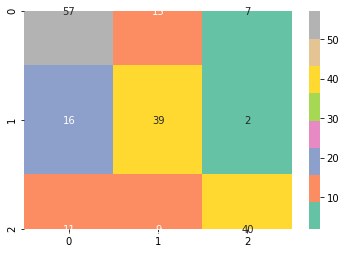

In [29]:
#plotting confusion matrix
sns.heatmap(cm,
           annot=True,
           cmap="Set2")
plt.show()